In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import pandas_profiling
import sweetviz as sv # for sweet viz eda
from scipy.stats import zscore # zscore to standrize data
from scipy import linalg as LA


# Problem 1 

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

[Assume all of the ANOVA assumptions are satisfied]

1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

1.6) Mention the business implications of performing ANOVA for this particular case study.

In [4]:
DF = pd.read_csv('Fever.csv')

In [5]:
DF.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [157]:
DF.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [158]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


# 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]



# For Variable A 
## NULL hypotheis : The mean of all the three levels in  the ingrediant "A" are equal 
## H0: μA1 = μA2 = μA3 

## where A =  levels of  ingredientt A

## Alternative hypotheses :At least, one level mean is different from other levels for the  ingredient "A"
## H1: Means are not all equal.


# For Variable B
## NULL hypotheis : The mean of all the three levels in  the ingrediant "B" are equal 
## H0: μB1 = μB2 = μB3 

## where B =  levels of  ingredient B

## Alternative hypotheses :At least, one level mean is different from other levels for the  ingredient "B"
## H1: Means are not all equal.

In [159]:
DF.A = pd.Categorical(DF.A)

In [160]:
DF.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [161]:
DF.B = pd.Categorical(DF.B)

In [162]:
DF.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [163]:
formula = 'Relief ~ C(A)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [164]:
alpha = 0.05
print ('alpha = ' , alpha)

if ((aov_table.iloc[0]['PR(>F)']) > alpha):
     print(" p > alpha. so  Null hypothesis is accepted.  The mean of all the three levels in  the ingrediant A are equal ")
else:
    print( " p < alpha  . so  Null hypothesis is rejected. At least, one level mean is different from other level means for the  ingredient A "  )
    

alpha =  0.05
 p < alpha  . so  Null hypothesis is rejected. At least, one level mean is different from other level means for the  ingredient A 


# 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [165]:
formula = 'Relief ~ C(B)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


In [166]:
alpha = 0.05
print ('alpha = ' , alpha)

if ((aov_table.iloc[0]['PR(>F)']) > alpha):
     print(" p > alpha. so  Null hypothesis is accepted.  The mean of all the three levels in  the ingrediant B are equal ")
else:
    print( " p < alpha  . so  Null hypothesis is rejected. At least, one level mean is different from other level means for the  ingredient B "  )
    

alpha =  0.05
 p < alpha  . so  Null hypothesis is rejected. At least, one level mean is different from other level means for the  ingredient B 


# 1.4) Analyse the effects of one variable on another with the help of an interaction plot.

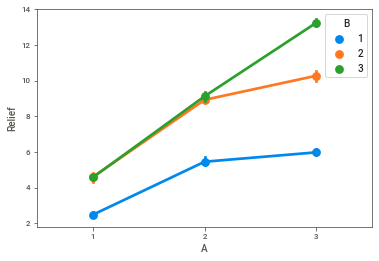

In [167]:
sns.pointplot(x='A', y='Relief', data=DF, hue='B')

##  From the above plot we can see that by using level three in both the active ingredicant ( A and B ) the Relief increases . when we reduce the level, Relief decreases . 

# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

## From two-way ANOVA, we can tests three hypotheses 1) effect of ingredient "A"  on Relief 2) effect of  ingredient "B" on Relief, and 3) effect of ingredients "A" and "B" interactions on Relief

In [168]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [169]:
alpha = 0.05
print ('alpha = ' , alpha)
print ( " is PValue is less than Alpha ")
aov_table['PR(>F)'] < alpha

alpha =  0.05
 is PValue is less than Alpha 


C(A)          True
C(B)          True
C(A):C(B)     True
Residual     False
Name: PR(>F), dtype: bool

## The P-value obtained from ANOVA analysis for ingredient "A",ingredient "B" and interaction (A & B) are statistically significant (P < alpha )

# 1.6) Mention the business implications of performing ANOVA for this particular case study.

## We conclude that Levels of ingredient " A "   significantly affects the Relief outcome, levels of  ingredient " B "    significantly affects the Relief outcome, and interaction of both  ingredients  " A and B "  significantly affects the Relief outcome.

# Problem 2 

The dataset Education - Post 12th Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 

2.3) Comment on the comparison between covariance and the correlation matrix.

2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

2.5) Build the covariance matrix, eigenvalues, and eigenvector.

2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
Perform PCA and export the data of the Principal Component scores into a data frame.

2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

In [4]:
data_df = pd.read_csv("Education+-+Post+12th+Standard.csv")
data_df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [172]:
data_df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [173]:
data_df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [208]:
data_df.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [175]:
# Check for duplicate data

dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_df[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [177]:
# Check for correlation of variable
data_df.corr(method='pearson')

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [210]:
print(" Univariate , Multivariate Analysis using sweetviz")

report1 = sv.analyze(data_df)
report1.show_html('Education_data_EDA.html')


:Apps:                             |██▏                  | [ 11%]   00:00  -> (00:00 left)

 Univariate , Multivariate Analysis using sweetviz


:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report Education_data_EDA.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## enroll has high correlation with accept , apps ,f.undergrad. 

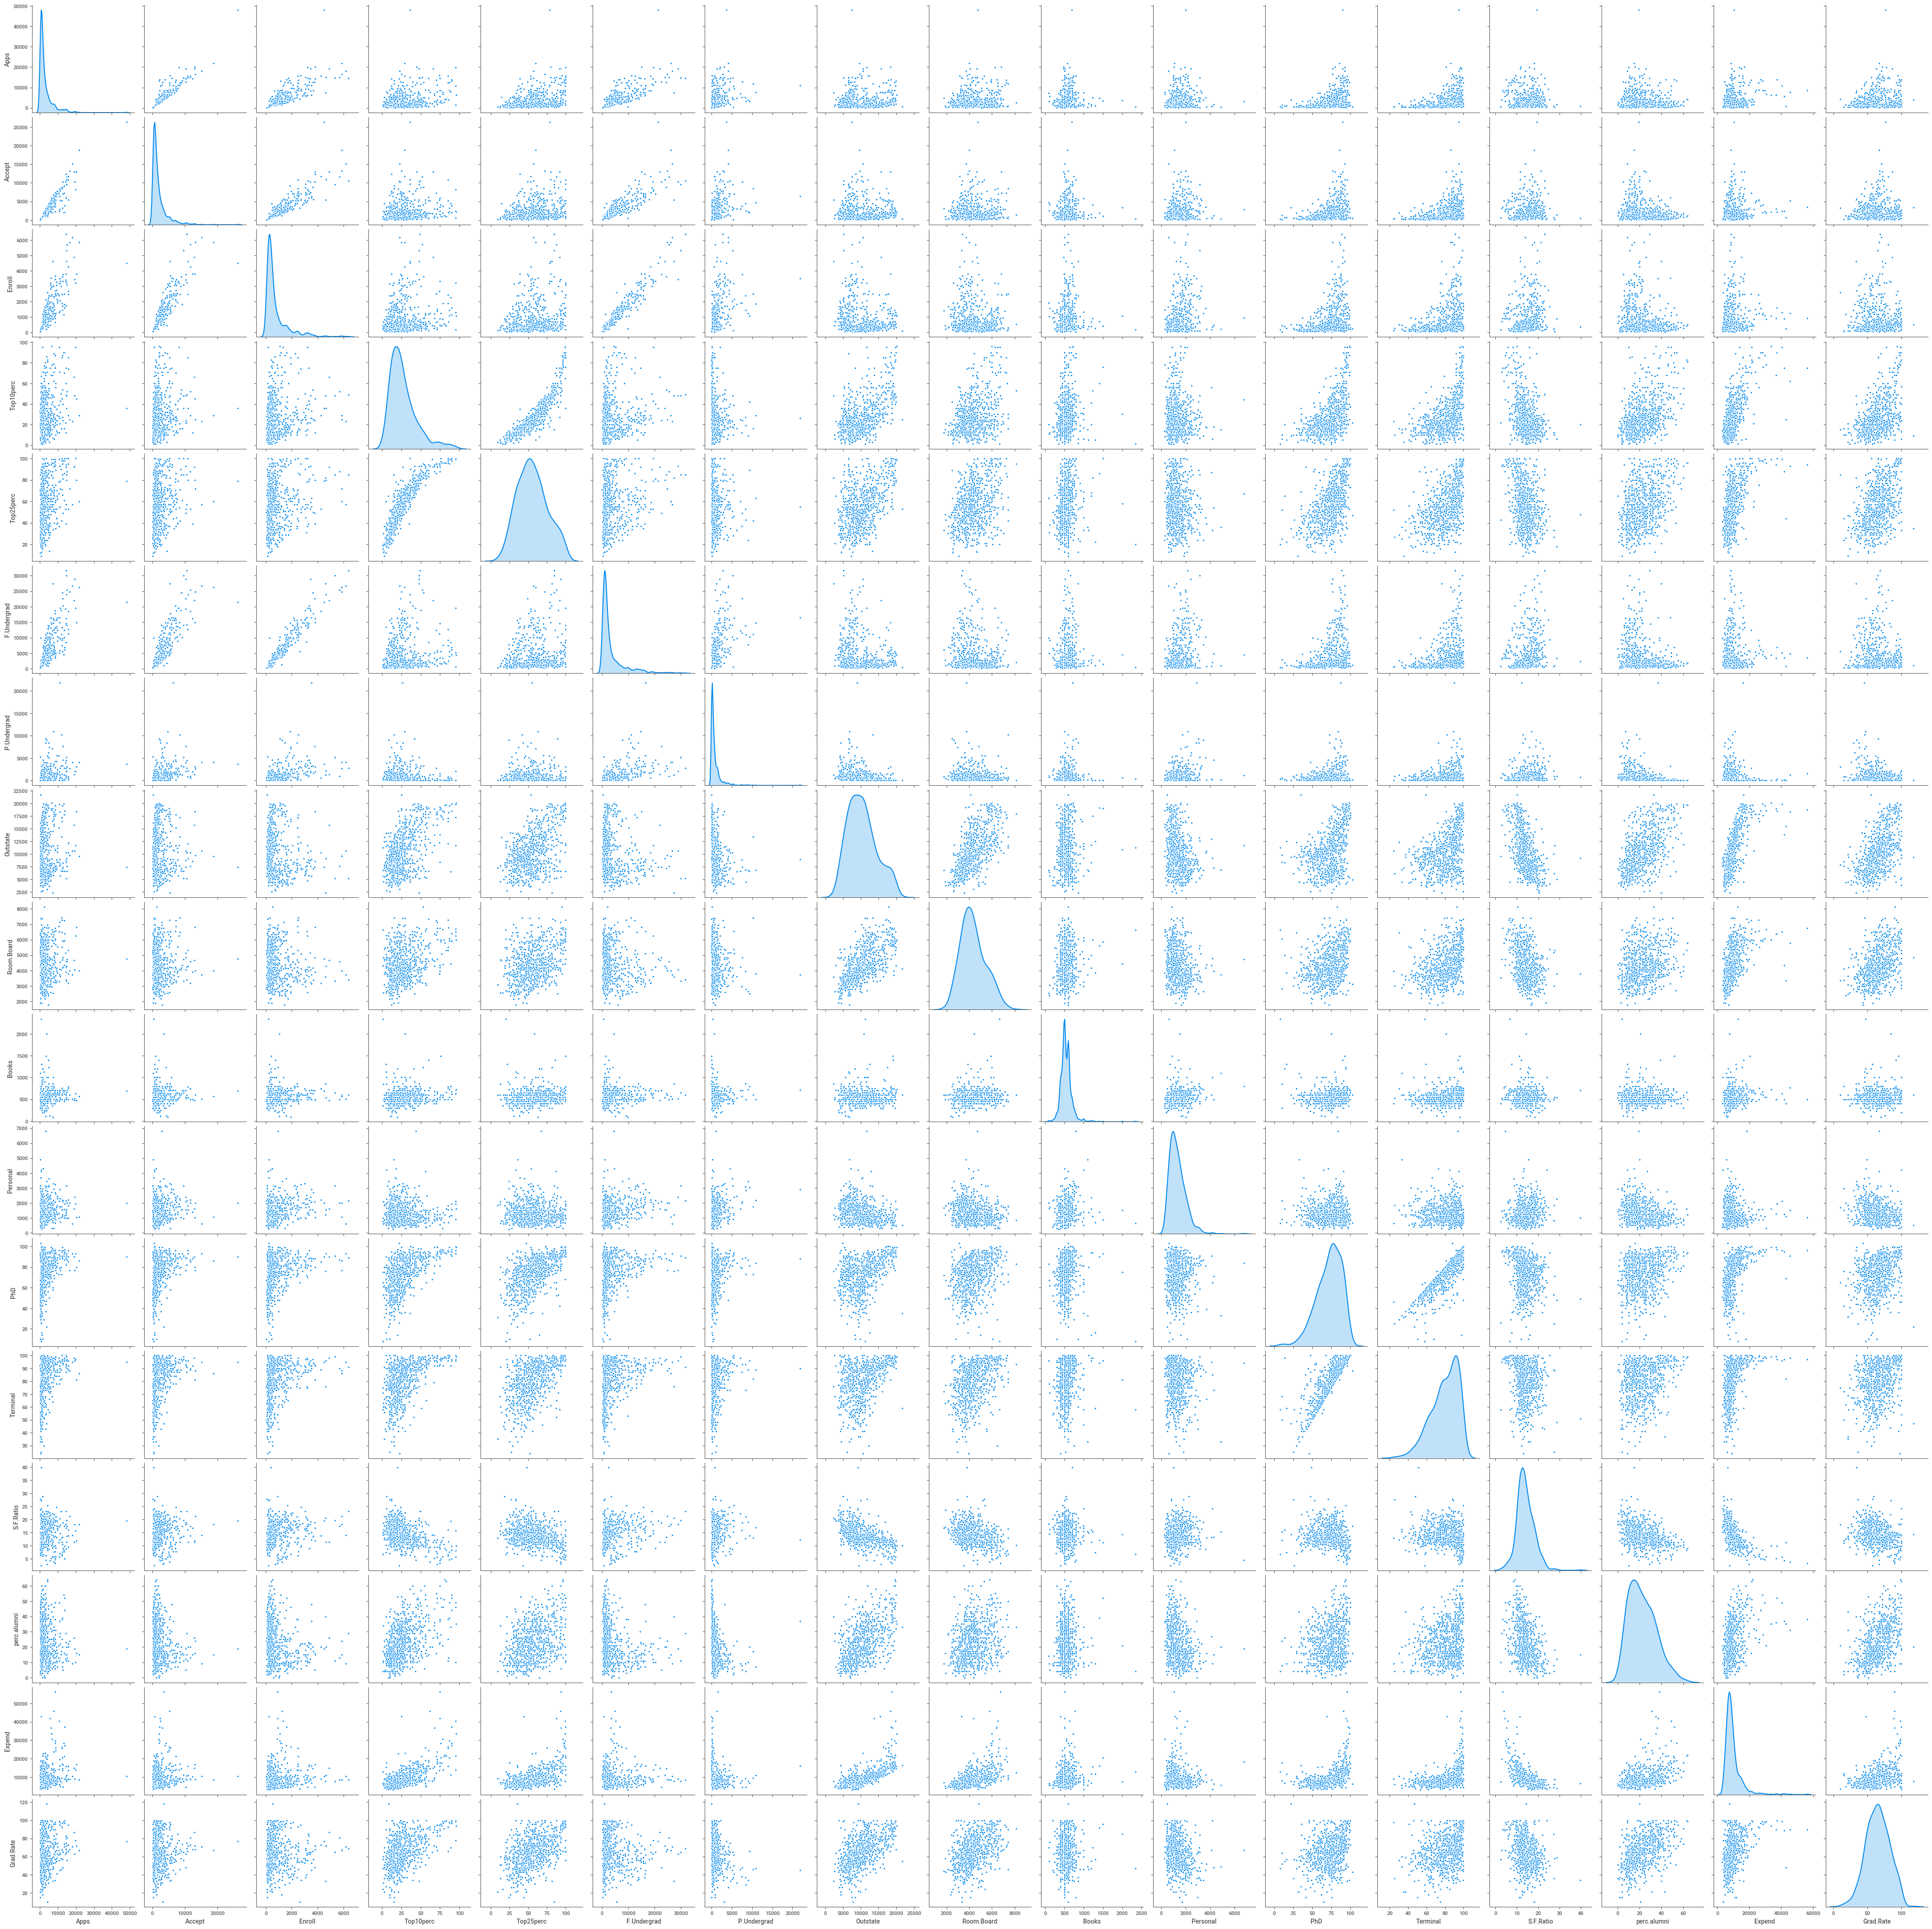

In [179]:
sns.pairplot(data_df,diag_kind='kde')

## Distribution of variables shows most of the values are concentrated on lower side.
## Relationship between variables shows come correlation.

# 2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 

In [5]:
# Drop Names
data_new = data_df.drop(['Names'], axis =1)

data_new.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


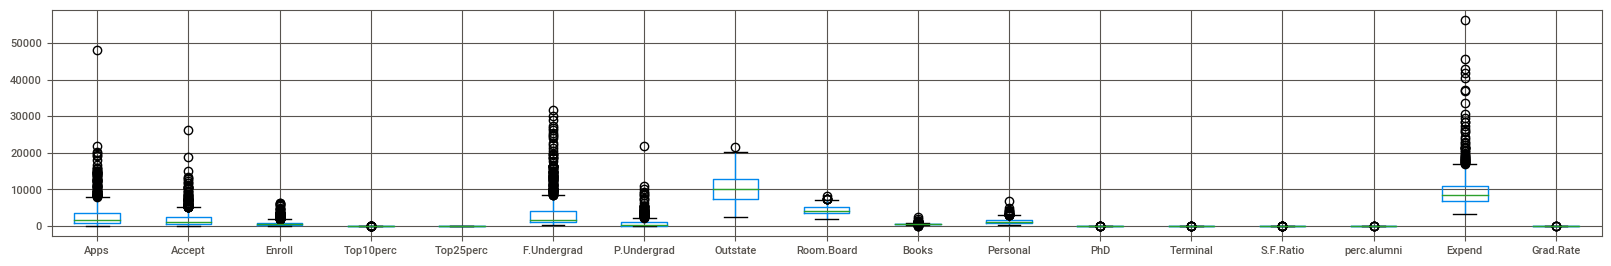

In [181]:
data_new.boxplot(figsize=(20,3))

In [182]:
print (" To standardize the process we will use zscaler ")

data_scale=data_new.apply(zscore)
data_scale.head()

 To standardize the process we will use zscaler 


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


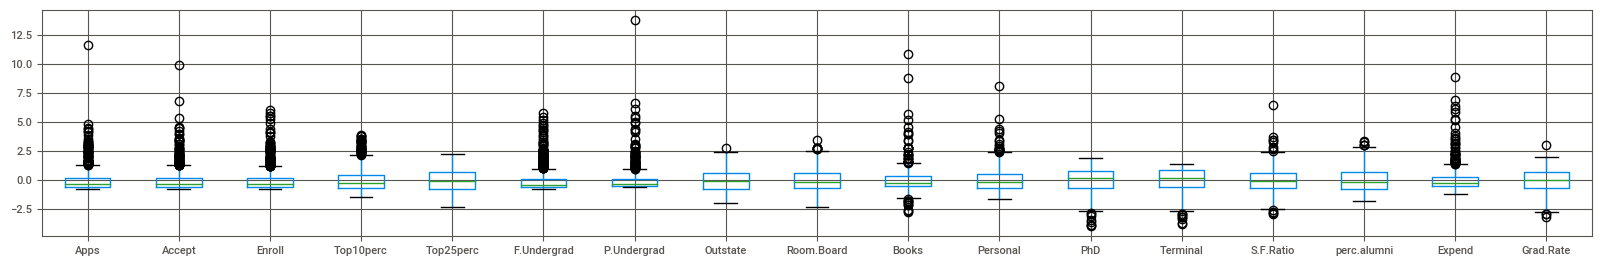

In [183]:
data_scale.boxplot(figsize=(20,3))

In [211]:
data_scale.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
mean,6.355797e-17,6.774575e-17,-5.249269e-17,-2.753232e-17,-1.546739e-16,-1.661405e-16,-3.029180e-17,6.515595e-17,3.570717e-16,-2.192583e-16,4.765243e-17,5.954768e-17,-4.481615e-16,-2.057556e-17,-6.022638e-17,1.213101e-16,3.886495e-16
std,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00
min,-7.551337e-01,-7.947645e-01,-8.022728e-01,-1.506526e+00,-2.364419e+00,-7.346169e-01,-5.615022e-01,-2.014878e+00,-2.351778e+00,-2.747779e+00,-1.611860e+00,-3.962596e+00,-3.785982e+00,-2.929799e+00,-1.836580e+00,-1.240641e+00,-3.230876e+00
25%,-5.754408e-01,-5.775805e-01,-5.793514e-01,-7.123803e-01,-7.476067e-01,-5.586426e-01,-4.997191e-01,-7.762035e-01,-6.939170e-01,-4.810994e-01,-7.251203e-01,-6.532948e-01,-5.915023e-01,-6.546598e-01,-7.868237e-01,-5.574826e-01,-7.260193e-01
50%,-3.732540e-01,-3.710108e-01,-3.725836e-01,-2.585828e-01,-9.077663e-02,-4.111378e-01,-3.301442e-01,-1.120949e-01,-1.437297e-01,-2.992802e-01,-2.078552e-01,1.433889e-01,1.561419e-01,-1.237939e-01,-1.408197e-01,-2.458933e-01,-2.698956e-02
75%,1.609122e-01,1.654173e-01,1.314128e-01,4.221134e-01,6.671042e-01,6.294077e-02,7.341765e-02,6.179271e-01,6.318245e-01,3.067838e-01,5.310950e-01,7.562224e-01,8.358184e-01,6.093067e-01,6.666852e-01,2.241735e-01,7.302926e-01
max,1.165867e+01,9.924816e+00,6.043678e+00,3.882319e+00,2.233391e+00,5.764674e+00,1.378992e+01,2.800531e+00,3.436593e+00,1.085230e+01,8.068387e+00,1.859323e+00,1.379560e+00,6.499390e+00,3.331452e+00,8.924721e+00,3.060392e+00


## INFERENCE WE USED ZSCALER TO STANDARIZE THE DATA INTO SINGLE SCALE . NOW ALL variables are in in between the scale of -2.5 to 12.5 .

# 2.3) Comment on the comparison between covariance and the correlation matrix.

In [184]:
# Check for correlation of variable
data_new.corr(method='pearson')

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [185]:
data_new.cov()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.497846e+07,8.949860e+06,3.045256e+06,23132.773138,26952.663479,1.528970e+07,2.346620e+06,7.809704e+05,7.000729e+05,84703.752639,4.683468e+05,24689.433666,21053.067602,1465.060576,-4327.122381,5.246171e+06,9756.421641
Accept,8.949860e+06,6.007960e+06,2.076268e+06,8321.124872,12013.404757,1.039358e+07,1.646670e+06,-2.539623e+05,2.443471e+05,45942.807867,3.335566e+05,14238.201489,12182.093828,1709.838189,-4859.487022,1.596272e+06,2834.162918
Enroll,3.045256e+06,2.076268e+06,8.633684e+05,2971.583415,4172.592435,4.347530e+06,7.257907e+05,-5.811885e+05,-4.099706e+04,17291.199742,1.767380e+05,5028.961166,4217.086027,872.684773,-2081.693787,3.113454e+05,-356.587977
Top10perc,2.313277e+04,8.321125e+03,2.971583e+03,311.182456,311.630480,1.208911e+04,-2.829475e+03,3.990718e+04,7.186706e+03,346.177405,-1.114551e+03,153.184870,127.551581,-26.874525,99.567208,6.087931e+04,149.992164
Top25perc,2.695266e+04,1.201340e+04,4.172592e+03,311.630480,392.229216,1.915895e+04,-1.615412e+03,3.899243e+04,7.199904e+03,377.759266,-1.083605e+03,176.518449,153.002612,-23.097199,102.550946,5.454648e+04,162.371398
F.Undergrad,1.528970e+07,1.039358e+07,4.347530e+06,12089.113681,19158.952782,2.352658e+07,4.212910e+06,-4.209843e+06,-3.664582e+05,92535.764728,1.041709e+06,25211.784197,21424.241746,5370.208581,-13791.929691,4.724040e+05,-6563.307527
P.Undergrad,2.346620e+06,1.646670e+06,7.257907e+05,-2829.474981,-1615.412144,4.212910e+06,2.317799e+06,-1.552704e+06,-1.023919e+05,20410.446674,3.297324e+05,3706.756219,3180.596615,1401.302563,-5297.337090,-6.643512e+05,-6721.062488
Outstate,7.809704e+05,-2.539623e+05,-5.811885e+05,39907.179832,38992.427500,-4.209843e+06,-1.552704e+06,1.618466e+07,2.886597e+06,25808.242145,-8.146737e+05,25157.515051,24164.147673,-8835.253539,28229.553066,1.413324e+07,39479.681796
Room.Board,7.000729e+05,2.443471e+05,-4.099706e+04,7186.705605,7199.903568,-3.664582e+05,-1.023919e+05,2.886597e+06,1.202743e+06,23170.313390,-1.480838e+05,5895.034749,6047.299735,-1574.205914,3701.431379,2.873308e+06,8005.360183
Books,8.470375e+04,4.594281e+04,1.729120e+04,346.177405,377.759266,9.253576e+04,2.041045e+04,2.580824e+04,2.317031e+04,27259.779946,2.004303e+04,72.534242,242.963918,-20.867207,-82.263132,9.691258e+04,3.008837


## Covariance indicates the direction of the linear relationship between variables. Correlation  measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance. What sets them apart is the fact that correlation values are standardized whereas, covariance values are not. 

# 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

Box plot for data before scaling with outliers


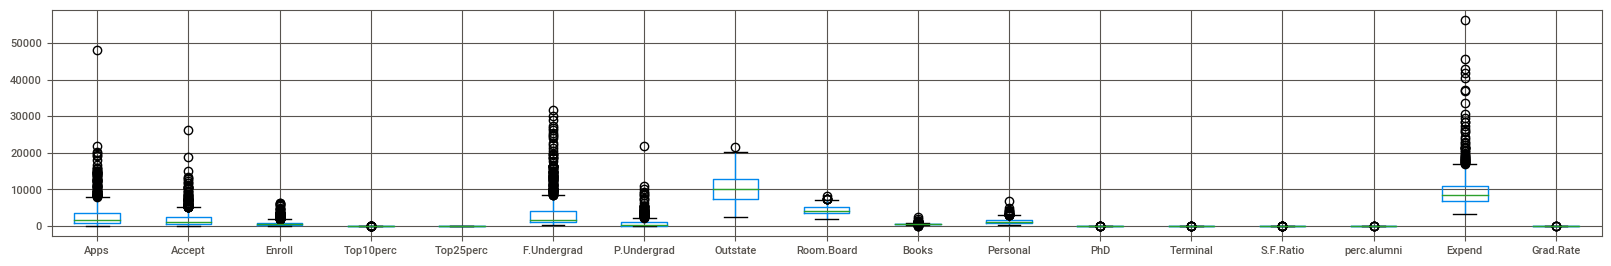

In [186]:
print("Box plot for data before scaling with outliers" )
data_new.boxplot(figsize=(20,3))

Box plot for data after scaling with outliers


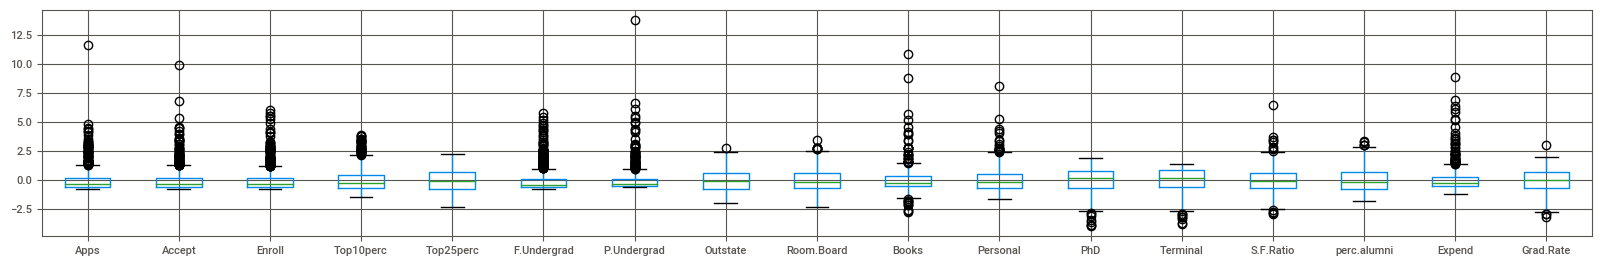

In [187]:
print("Box plot for data after scaling with outliers" )
data_scale.boxplot(figsize=(20,3))

In [188]:
data_scale.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
mean,6.355797e-17,6.774575e-17,-5.249269e-17,-2.753232e-17,-1.546739e-16,-1.661405e-16,-3.029180e-17,6.515595e-17,3.570717e-16,-2.192583e-16,4.765243e-17,5.954768e-17,-4.481615e-16,-2.057556e-17,-6.022638e-17,1.213101e-16,3.886495e-16
std,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00
min,-7.551337e-01,-7.947645e-01,-8.022728e-01,-1.506526e+00,-2.364419e+00,-7.346169e-01,-5.615022e-01,-2.014878e+00,-2.351778e+00,-2.747779e+00,-1.611860e+00,-3.962596e+00,-3.785982e+00,-2.929799e+00,-1.836580e+00,-1.240641e+00,-3.230876e+00
25%,-5.754408e-01,-5.775805e-01,-5.793514e-01,-7.123803e-01,-7.476067e-01,-5.586426e-01,-4.997191e-01,-7.762035e-01,-6.939170e-01,-4.810994e-01,-7.251203e-01,-6.532948e-01,-5.915023e-01,-6.546598e-01,-7.868237e-01,-5.574826e-01,-7.260193e-01
50%,-3.732540e-01,-3.710108e-01,-3.725836e-01,-2.585828e-01,-9.077663e-02,-4.111378e-01,-3.301442e-01,-1.120949e-01,-1.437297e-01,-2.992802e-01,-2.078552e-01,1.433889e-01,1.561419e-01,-1.237939e-01,-1.408197e-01,-2.458933e-01,-2.698956e-02
75%,1.609122e-01,1.654173e-01,1.314128e-01,4.221134e-01,6.671042e-01,6.294077e-02,7.341765e-02,6.179271e-01,6.318245e-01,3.067838e-01,5.310950e-01,7.562224e-01,8.358184e-01,6.093067e-01,6.666852e-01,2.241735e-01,7.302926e-01
max,1.165867e+01,9.924816e+00,6.043678e+00,3.882319e+00,2.233391e+00,5.764674e+00,1.378992e+01,2.800531e+00,3.436593e+00,1.085230e+01,8.068387e+00,1.859323e+00,1.379560e+00,6.499390e+00,3.331452e+00,8.924721e+00,3.060392e+00


## without removing the outliers if we scale the data  using z score it wil affect the mean and the standard deviation of the data . from the above analysis we can see that the standard deviation for scaled data with outliers is 1.00644.

In [6]:
print("removing the outlier   ")


def outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)


data_wo =data_new.apply(outlier)
data_wo.head()





removing the outlier   


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,52.8,12.2,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,17974.8,59.0
4,193.0,146.0,55.0,16.0,44,249.0,869.0,7560.0,4120.0,765.6,1500.0,76.0,72.0,11.9,2.0,10922.0,37.0


In [190]:
data_wo.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,2856.956242,1917.760103,748.335907,26.853024,55.796654,3678.852767,744.579408,10436.548263,4347.803089,539.029086,1311.275418,72.942600,79.919434,14.042471,22.644788,9245.924582,65.524067
std,3120.470980,1942.822994,781.271463,15.607194,19.804778,4414.345270,940.269547,4013.095875,1073.326060,110.372183,579.698842,15.556248,14.150183,3.667058,12.140180,3547.297573,16.887333
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,275.000000,250.000000,29.000000,41.000000,4.300000,0.000000,3186.000000,18.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.000000
max,11066.200000,6979.200000,2757.000000,65.200000,100.000000,14477.800000,3303.600000,20100.000000,7131.000000,795.000000,2958.000000,103.000000,100.000000,23.600000,58.000000,17974.800000,100.000000


In [7]:
print(" scaling data after removing outliers")

data_scale_wo=data_wo.apply(zscore)
data_scale_wo.head()

 scaling data after removing outliers


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.383829,-0.353198,-0.035012,-0.247034,-0.191827,-0.179951,-0.220908,-0.747173,-0.976849,-0.807146,1.534067,-0.189281,-0.135735,1.107193,-0.877388,-0.621979,-0.327324
1,-0.215156,0.003214,-0.302696,-0.695834,-1.353911,-0.225740,0.513397,0.459655,1.959843,1.912681,0.325766,-2.826575,-1.917777,-0.502762,-0.547691,0.361374,-0.564340
2,-0.458225,-0.422730,-0.528115,-0.311148,-0.292878,-0.599082,-0.687032,0.202830,-0.557322,-1.260450,-0.252493,-1.282793,-0.984326,-0.311750,0.606247,-0.144125,-0.682848
3,-0.782423,-0.807984,-0.782992,2.125195,1.677612,-0.718316,-0.725344,0.629209,1.027560,-0.807146,-0.753075,1.225853,1.207869,-1.730694,1.183216,2.462296,-0.386578
4,-0.854253,-0.912539,-0.888017,-0.695834,-0.596031,-0.777479,0.132410,-0.717252,-0.212377,2.054112,0.325766,0.196665,-0.560031,-0.584624,-1.701629,0.472798,-1.690169


Before scaling and after scaling comparision of   the  data without outliers 

data before scaling without outliers


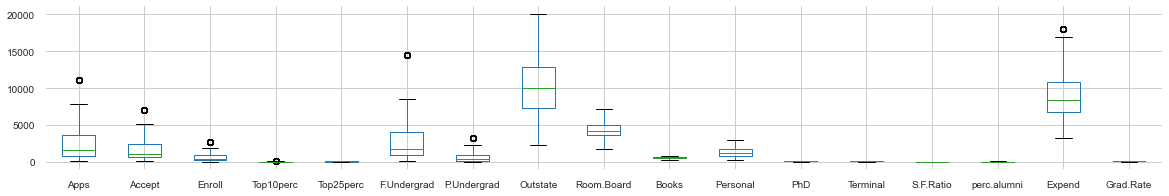

In [11]:
print ("data before scaling without outliers")
data_wo.boxplot(figsize=(20,3))


data after scaling without outliers


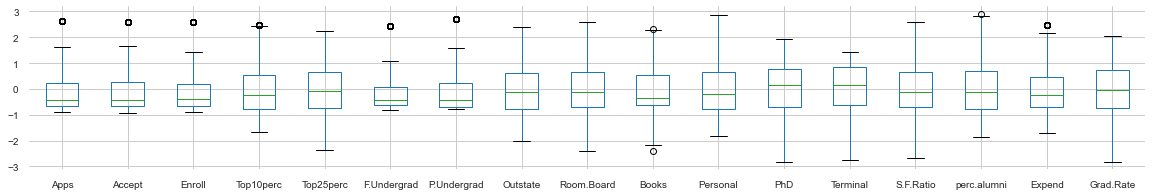

In [12]:
print ("data after scaling without outliers")
data_scale_wo.boxplot(figsize=(20,3))


## The outliers are reduced / replaced from the data set 

# 2.5) Build the covariance matrix, eigenvalues, and eigenvector.

In [21]:

cov_matrix = np.cov(data_scale_wo.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.34924522e-01  8.71047851e-01  3.24267498e-01
   3.62868715e-01  8.17850066e-01  5.01757457e-01  6.32865674e-02
   1.82959147e-01  2.33291015e-01  2.29533091e-01  4.46769909e-01
   4.17266656e-01  1.14213807e-01 -1.00610235e-01  2.54533823e-01
   1.47156965e-01]
 [ 9.34924522e-01  1.00128866e+00  9.22355696e-01  2.20622220e-01
   2.68343861e-01  8.71549611e-01  5.56937826e-01 -1.42554840e-02
   1.10325234e-01  2.13905650e-01  2.56349672e-01  4.07561902e-01
   3.84055661e-01  1.82533467e-01 -1.62609751e-01  1.66268254e-01
   6.95416281e-02]
 [ 8.71047851e-01  9.22355696e-01  1.00128866e+00  1.67564256e-01
   2.24859762e-01  9.48490114e-01  6.42498582e-01 -1.60758239e-01
  -3.72502918e-02  2.13398113e-01  3.47533881e-01  3.61278980e-01
   3.36082067e-01  2.67904002e-01 -2.13741732e-01  5.73414255e-02
  -4.05441513e-02]
 [ 3.24267498e-01  2.20622220e-01  1.67564256e-01  1.00128866e+00
   9.14894801e-01  1.03808804e-01 -1.46595772e-01  5.64307196e-

In [24]:
print(" eigen values and eigen vector ")
eig_vals, eig_vecs = LA.eigh(cov_matrix) # used eigh instead of eif for performance gain 
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

 eigen values and eigen vector 
Eigen Vectors 
%s [[-1.51051724e-01  5.73869368e-01  2.54721171e-02  3.50002377e-01
  -4.76265776e-01 -2.73993248e-02 -6.79408155e-02 -1.34049566e-01
   1.84655032e-01  3.41030317e-02  1.23782113e-02  4.76414519e-02
  -2.28743180e-01 -1.02559773e-01  9.77100175e-02 -3.24930495e-01
  -2.42671239e-01]
 [ 4.52766958e-01 -6.43625404e-01 -4.08143058e-02  1.12837998e-01
  -2.08677137e-01 -1.27528369e-01 -2.86891699e-02 -1.23207526e-01
   1.89697047e-01  1.02521665e-01 -1.41529768e-03  3.31338141e-02
  -2.02792107e-01 -1.21914245e-01  1.25144023e-01 -3.57755851e-01
  -2.08095876e-01]
 [-7.50067816e-01 -2.58381892e-01  3.37484396e-02 -2.25003975e-01
   2.65981931e-01 -1.80558174e-02 -2.29745788e-02 -4.79563882e-02
   5.20184210e-02  1.34762063e-01  7.92830517e-03 -3.89761143e-02
  -1.72168365e-01 -1.42497171e-02  9.44419384e-02 -3.95824297e-01
  -1.64564266e-01]
 [ 5.89947774e-02 -5.31897461e-02  7.23553559e-01 -3.22924466e-02
  -1.62488072e-02  4.57358763e-02 -

# 2.6) Write the explicit form of the first PC . (in terms of Eigen Vectors).

In [26]:
print("The the explicit form of the first PC :") 
idx = np.argsort(eig_vals)[::-1]
evecs = eig_vecs[:,idx]
evals = eig_vals[idx]
evecs = evecs[:, :1]
pc1=np.dot(evecs.T, data_scale_wo.T)

pc1

The the explicit form of the first PC :


array([[ 1.73690056,  1.59813592,  1.54279982, -3.18198787,  1.78588136,
         0.54961821, -0.23204615, -1.90442505, -0.79778763,  2.83704769,
        -1.92917206, -2.19751868,  0.08621937, -0.88461566,  2.20172327,
         1.50532369, -5.22639492,  2.21614773,  2.02850424,  2.98218645,
        -0.16647671, -0.42486665,  1.79587893, -1.14116234, -0.69064956,
         3.45608305, -1.26658595, -1.35107274,  1.65014044, -1.02727695,
         0.94417962, -1.16286652,  2.65509454,  1.96644492,  0.03207601,
         1.15445763, -3.82111755, -3.73537582,  0.47199807, -1.35922637,
        -0.45281261,  0.05659088,  1.70842694,  1.34404146, -0.93545893,
         3.64699493,  2.20110218,  0.40224536, -1.26850553,  0.34056911,
         2.04117675,  1.46787903,  3.21901363,  3.46314232, -1.14836404,
         1.16531024,  1.04781343,  3.13600604,  1.27843908, -4.91626359,
        -5.31141129, -0.72430214,  0.56153994, -0.81583818, -4.20667789,
         1.60678943,  3.93267614,  2.29319743,  0.5

# 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [213]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance ", cum_var_exp)

Cumulative Variance  [ 33.15185743  61.52550945  67.98957029  73.84487717  79.11892366
  83.61602283  87.06508197  90.32266981  92.9263317   95.17182864
  96.61489423  97.47757639  98.27677262  99.00385952  99.44252192
  99.77139178 100.        ]


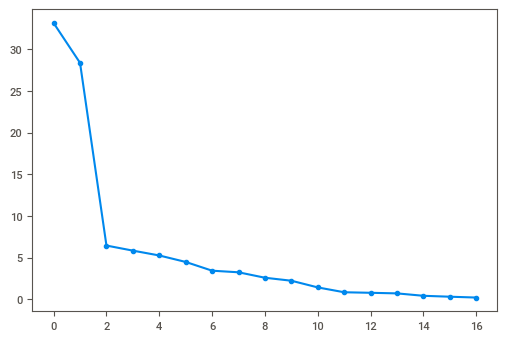

In [198]:
plt.plot(var_exp,marker='o')

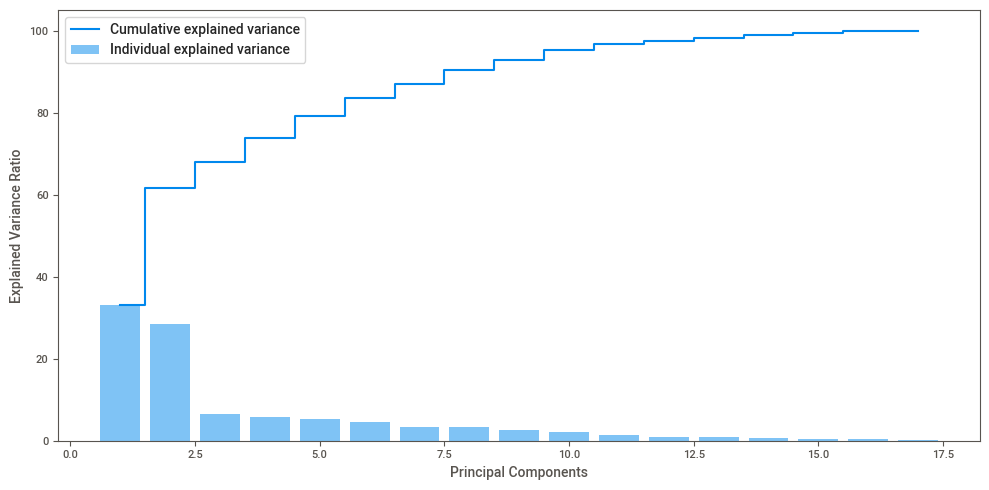

In [199]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## cumulative values  is the created by  adding all the  eigen values and finding the proportion of each . 
## By knowing the cumulative values we can know how many percent of information is captured in each princple components  and decide the number of optimum number .
## eigen vector indicate the coefficeint of the features or numerical columns . 
## from the above cumative graph we can find that first  two PCA   components is picking up around 60 percenatge 

## perform pca

In [28]:
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data_scale_wo)
data_reduced.transpose()

array([[-1.73690053, -1.59813581, -1.54279973, ..., -0.67443644,
         6.66048791, -0.6221198 ],
       [ 0.78652265, -0.33203957, -1.37926802, ..., -0.14322336,
        -1.08947693,  0.6305696 ],
       [ 0.09133568,  2.12900719, -0.60248546, ...,  0.37330935,
         1.41457434, -1.31505495]])

In [29]:
pca.components_

array([[ 0.24267124,  0.20809588,  0.16456426,  0.34463353,  0.3378584 ,
         0.13428768,  0.01451289,  0.29730457,  0.25119209,  0.09356817,
        -0.04846688,  0.32466755,  0.32050993, -0.17847668,  0.19861754,
         0.340157  ,  0.24864478],
       [ 0.3249305 ,  0.35775585,  0.3958243 , -0.07539009, -0.03672114,
         0.40624366,  0.35491664, -0.23736241, -0.12378905,  0.10601539,
         0.23546922,  0.07065175,  0.05966641,  0.2478349 , -0.24326185,
        -0.13574786, -0.16060776],
       [-0.09770984, -0.12514369, -0.09444208,  0.07238596,  0.04633753,
        -0.08724016, -0.0386964 , -0.02059074,  0.02606922,  0.71355796,
         0.52183437, -0.05725878, -0.03745711, -0.25837559, -0.1099067 ,
         0.1729297 , -0.23102818]])

In [32]:
principalDf = pd.DataFrame(data = data_reduced
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-1.736901,0.786523,0.091336
1,-1.598136,-0.332040,2.129007
2,-1.542800,-1.379268,-0.602485
3,3.181988,-2.993983,0.335527
4,-1.785882,-0.202226,2.731232


In [214]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_scale_wo))

df_comp

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.242671,0.208096,0.164564,0.344634,0.337858,0.134288,0.014513,0.297305,0.251192,0.093568,-0.048467,0.324668,0.320510,-0.178477,0.198618,0.340157,0.248645
1,0.324930,0.357756,0.395824,-0.075390,-0.036721,0.406244,0.354917,-0.237362,-0.123789,0.106015,0.235469,0.070652,0.059666,0.247835,-0.243262,-0.135748,-0.160608
2,-0.097708,-0.125144,-0.094443,0.072386,0.046337,-0.087241,-0.038696,-0.020593,0.026069,0.713558,0.521835,-0.057264,-0.037452,-0.258374,-0.109907,0.172933,-0.231027


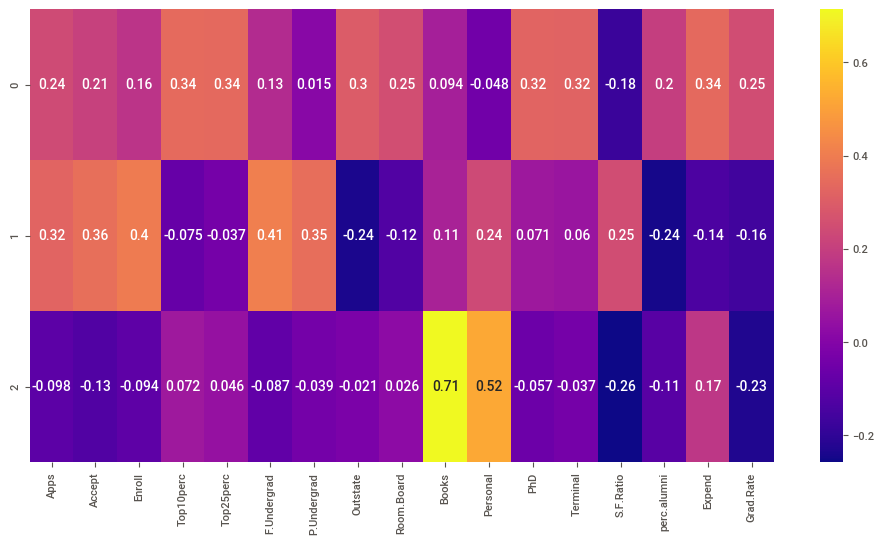

In [204]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',annot= True)

In [205]:
compabs= df_comp.abs()
print("The communality is ")
compabs.sum(axis = 0, skipna = True)



The communality is 


Apps           0.665310
Accept         0.690996
Enroll         0.654832
Top10perc      0.492410
Top25perc      0.420916
F.Undergrad    0.627773
P.Undergrad    0.408125
Outstate       0.555260
Room.Board     0.401050
Books          0.913141
Personal       0.805771
PhD            0.452584
Terminal       0.417628
S.F.Ratio      0.684686
perc.alumni    0.551786
Expend         0.648838
Grad.Rate      0.640280
dtype: float64

# 2.8)Mention the business implication of using the Principal Component Analysis for this case study


## The three Principle compoennts (PC0 ,PC1 and PC2 ) created are free from multicollenerity 
## Just three PCA (out of 17 ) components is picking up around  68 % of variability .
## PC0 explains most of variables at average level of .22 with good  explanity for top 10 perc , top 20 perct,expend,phd,  terminal, outstate variables.
## pc1 has good  explanity for f.undergrad ,enroll ,accept,punderground , accept and apps 
## PC2 has highest explanity for  Books and personal .
## The highest communality variable is Personal with 81% communility 
## The lowest communality variable is  with 40 % communility 

